In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/CA683/dataset/'

In [ ]:
price_df = pd.read_csv(path + "bitcoin_price_usd.csv")

In [ ]:
tweet_df = pd.read_csv(path + "tweet_final_sentiment.csv")

In [ ]:
price_df.head(10)

,date,close_price
0,2012-01-01 00:00:00,4.58
1,2012-01-01 01:00:00,4.58
2,2012-01-01 02:00:00,4.58
3,2012-01-01 03:00:00,4.58
4,2012-01-01 04:00:00,4.58
5,2012-01-01 05:00:00,4.58
6,2012-01-01 06:00:00,4.58
7,2012-01-01 07:00:00,4.58
8,2012-01-01 08:00:00,4.58
9,2012-01-01 09:00:00,4.58


In [ ]:
tweet_df.head(5)

,Unnamed: 0,Unnamed: 0.1,timestamp,sentiment
0,26280,26280,2012-01-01 01:00:00,0.278788
1,26281,26281,2012-01-01 02:00:00,0.000000
2,26282,26282,2012-01-01 03:00:00,0.000000
3,26283,26283,2012-01-01 04:00:00,0.000000
4,26284,26284,2012-01-01 05:00:00,0.000000


In [ ]:
tweet_df.tail(5)

,Unnamed: 0,Unnamed: 0.1,timestamp,sentiment
69331,8011,8011,2019-11-30 20:00:00,0.0
69332,8012,8012,2019-11-30 21:00:00,0.0
69333,8013,8013,2019-11-30 22:00:00,0.0
69334,8014,8014,2019-11-30 23:00:00,0.0
69335,8015,8015,2019-11-30 23:59:59,0.0


In [ ]:
price_df.tail(5)

,date,close_price
78775,2020-12-30 18:52:00,28372.92
78776,2020-12-30 19:52:00,28718.05
78777,2020-12-30 20:52:00,28798.95
78778,2020-12-30 21:52:00,28842.93
78779,2020-12-30 22:52:00,28838.76


In [ ]:
tweet_df.tail(5)

,Unnamed: 0,Unnamed: 0.1,timestamp,sentiment
69331,8011,8011,2019-11-30 20:00:00,0.0
69332,8012,8012,2019-11-30 21:00:00,0.0
69333,8013,8013,2019-11-30 22:00:00,0.0
69334,8014,8014,2019-11-30 23:00:00,0.0
69335,8015,8015,2019-11-30 23:59:59,0.0


In [ ]:
tweet_df = tweet_df.iloc[26280:]

In [ ]:
tweet_df = tweet_df.reset_index(drop=True)

In [ ]:
price_df = price_df.iloc[1:]

In [ ]:
price_df = price_df.reset_index(drop=True)

In [ ]:
price_df.head(5)

,date,close_price
16,2012-01-01 00:00:00,4.58
17,2012-01-01 01:00:00,4.58
18,2012-01-01 02:00:00,4.58
19,2012-01-01 03:00:00,4.58
20,2012-01-01 04:00:00,4.58


In [ ]:
price_df = price_df.iloc[1:]

In [ ]:
price_df = price_df.reset_index(drop=True)

In [ ]:
price_df.head(5)

,date,close_price
15,2011-12-31 23:00:00,4.58
16,2012-01-01 00:00:00,4.58
17,2012-01-01 01:00:00,4.58
18,2012-01-01 02:00:00,4.58
19,2012-01-01 03:00:00,4.58


In [ ]:
price_df.drop(price_df.tail(8760).index,inplace=True)

In [ ]:
price_df.drop(price_df.tail(744).index,inplace=True)

In [ ]:
price_df.tail(5)

,date,close_price
69271,2019-11-30 18:52:00,7493.88
69272,2019-11-30 19:52:00,7507.12
69273,2019-11-30 20:52:00,7504.05
69274,2019-11-30 21:52:00,7522.23
69275,2019-11-30 22:52:00,7553.69


In [ ]:
tweet_df.drop(tweet_df.tail(60).index,inplace=True)

In [ ]:
tweet_df = tweet_df.reset_index(drop=True)

In [ ]:
price_df = price_df.reset_index(drop=True)

In [ ]:
df = pd.DataFrame()

In [ ]:
df["date"] = price_df["date"]
df["sentiment"] = tweet_df["sentiment"]
df["close_price"] = price_df["close_price"]

In [ ]:
df["sentiment"] = tweet_df["sentiment"]

In [ ]:
df.head(24)

,date,sentiment,close_price
0,2012-01-01 00:00:00,0.278788,4.58
1,2012-01-01 01:00:00,0.000000,4.58
2,2012-01-01 02:00:00,0.000000,4.58
3,2012-01-01 03:00:00,0.000000,4.58
4,2012-01-01 04:00:00,0.000000,4.58
5,2012-01-01 05:00:00,0.000000,4.58
6,2012-01-01 06:00:00,0.000000,4.58
7,2012-01-01 07:00:00,0.000000,4.58
8,2012-01-01 08:00:00,0.000000,4.58
9,2012-01-01 09:00:00,0.000000,4.58


In [ ]:
print("price = " + str(len(price_df)))
print("tweets = " + str(len(tweet_df)))

price = 69276
tweets = 69276


In [ ]:
price_df.to_csv(path + "final_price.csv", index=False)
tweet_df.to_csv(path + "final_tweets.csv", index=False)

In [ ]:
df.to_csv(path + "final_merged_dataset.csv", index=False)

In [ ]:
# Using data from Amazon's stock.
#df = pd.read_csv(path + 'Bitcoin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69276 entries, 0 to 69275
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         69276 non-null  object 
 1   sentiment    69276 non-null  float64
 2   close_price  69276 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.1+ MB


In [ ]:
df.head(5)

,date,sentiment,close_price
0,2012-01-01 00:00:00,0.278788,4.58
1,2012-01-01 01:00:00,0.000000,4.58
2,2012-01-01 02:00:00,0.000000,4.58
3,2012-01-01 03:00:00,0.000000,4.58
4,2012-01-01 04:00:00,0.000000,4.58


In [ ]:
df = pd.read_csv("final_merged_dataset.csv")

In [ ]:
len(df)

69276

In [ ]:
#check for null values 
df.isnull().sum()

date           0
sentiment      0
close_price    0
dtype: int64

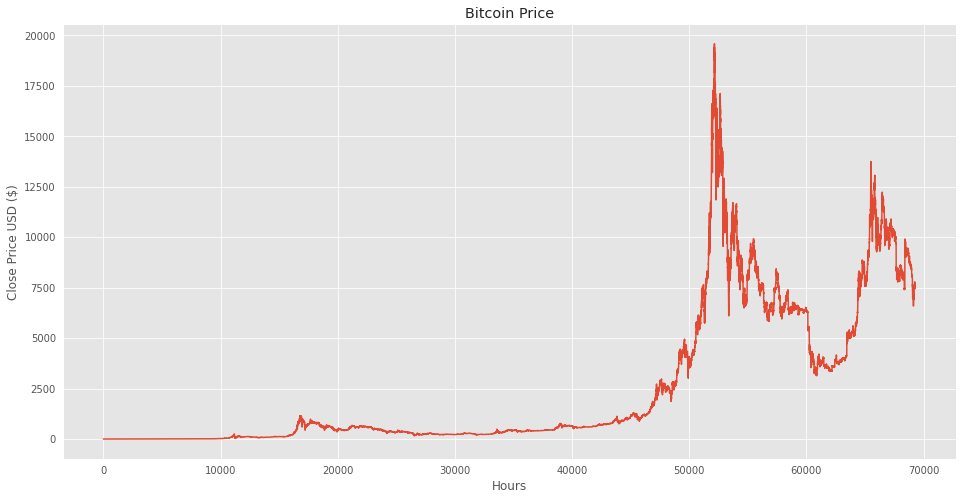

In [ ]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Bitcoin Price')
plt.xlabel('Hours')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close_price'])
plt.show()

In [ ]:
df_c = df['close_price']

In [ ]:
df_c = pd.DataFrame(df_c)

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69276 entries, 0 to 69275
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_price  69276 non-null  float64
dtypes: float64(1)
memory usage: 541.3 KB


In [ ]:
# Prediction 1000 hours into the future.
future_hours = 10000
df_c['Prediction'] = df_c['close_price'].shift(-future_hours)

In [ ]:
df_c.tail()
print(df_c.info())
df_c.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69276 entries, 0 to 69275
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_price  69276 non-null  float64
 1   Prediction   59276 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB
None


close_price        0
Prediction     10000
dtype: int64

In [ ]:
Z = np.array(df_c.drop(['Prediction'], 1))[:-future_hours]
print(Z)

[[4.58000e+00]
 [4.58000e+00]
 [4.58000e+00]
 ...
 [6.53809e+03]
 [6.48358e+03]
 [6.46882e+03]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
print(len(Z))

59276


In [ ]:
P = np.array(df_c['Prediction'])[:-future_hours]
print(len(P))

59276


In [ ]:
print(len(P))

59276


In [ ]:
print(len(Z))

59276


In [ ]:
data = df

In [ ]:
time_len = data.shape[0]

In [ ]:
x = data.filter(['sentiment', "close_price"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn import preprocessing

xx = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xx)
#df = pd.DataFrame(x_scaled)
print(x_scaled)

[[6.39393939e-01 2.24702116e-05]
 [5.00000000e-01 2.24702116e-05]
 [5.00000000e-01 2.24702116e-05]
 ...
 [5.00000000e-01 3.83010375e-01]
 [5.00000000e-01 3.83938803e-01]
 [5.00000000e-01 3.85545424e-01]]


In [ ]:
encoder = LabelEncoder()
xx[:,1] = encoder.fit_transform(xx[:,1])
# ensure all data is float
xx = xx.astype('float32')
# normalize feature
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(xx)
# frame as supervised learning
reframed = series_to_supervised(scaled, 2, 1)
# drop columns we don't want to predict
print(reframed.head())

   var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)  var1(t)   var2(t)
2   0.639394   0.000508        0.5   0.000508      0.5  0.000508
3   0.500000   0.000508        0.5   0.000508      0.5  0.000508
4   0.500000   0.000508        0.5   0.000508      0.5  0.000508
5   0.500000   0.000508        0.5   0.000508      0.5  0.000508
6   0.500000   0.000508        0.5   0.000508      0.5  0.000508


In [ ]:
import keras
from keras.datasets import reuters, imdb
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout, Activation, Embedding, ConvLSTM2D,Bidirectional, Conv2D,Conv1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras import metrics as met2
import math
from numpy import concatenate

In [ ]:
labels = reframed.values[:,-1]
print(len(labels))
#labels = labels.astype('int')
print(reframed.shape)
features = reframed.values[:,:8]
print(features.shape,labels.shape)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
x_train = x_train.reshape((x_train.shape[0], 6, 1))
x_test = x_test.reshape((x_test.shape[0],6, 1))
print(x_train.shape)

69274
(69274, 6)
(69274, 6) (69274,)
(55419, 6, 1)


In [ ]:
# design network
#for i in range(1,10):
model = Sequential()
#model.add(Conv2D(100, 2, activation='relu'))
#model.add(SimpleRNN(32))
model.add(Bidirectional(LSTM(100), input_shape=(x_train.shape[1], x_train.shape[2])))
#model.add(ConvLSTM2D(2,kernel_size = (3,3),input_shape =(None,x_train.shape[1], x_train.shape[2],1) ,padding='same', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss='binary_crossentropy', metrics=[met2.binary_accuracy], optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_data=(x_test, y_test), verbose=0, shuffle=False)
# plot history
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              81600     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________
None


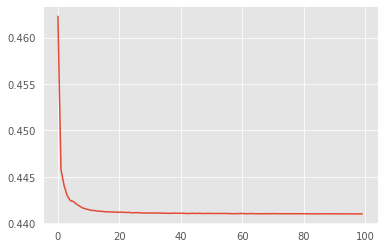

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.show()

In [ ]:
# make a prediction

yhat = model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.003


In [ ]:
yhat = yhat.astype("float64")
y2 = yhat
for i in range(yhat.shape[0]):
    if y2[i] >0.5:
        y2[i] = 1
    else:
        y2[i] = 0
matrix = metrics.confusion_matrix(y_test,yhat)
#acc = met2.binary_accuracy(y_test,keras.backend.round(yhat),threshold=0.5)
print(matrix)
#print(acc)

score = model.evaluate(x_test, y_test, batch_size=72, verbose=1)
print('Test score:', score[1])

In [ ]:
df.set_index('date',inplace=True)  #making DateTime as index. Because we are doing Time series Analysis
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]   #just making the price as the first column
df = df[cols]
df.head()

,close_price,sentiment
date,,
2012-01-01 00:00:00,4.58,0.278788
2012-01-01 01:00:00,4.58,0.000000
2012-01-01 02:00:00,4.58,0.000000
2012-01-01 03:00:00,4.58,0.000000
2012-01-01 04:00:00,4.58,0.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) #scaling values from 0 to 1
scaled = scaler.fit_transform(df.values)

n_hours = 3
n_features = 1              
n_obs = n_hours*n_features

reframed = series_to_supervised(scaled, n_hours, 1)  #t-3,t-2,t-1 values of all the columns. you can change n_hours for this
reframed.head()

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
3,0.000022,0.639394,0.000022,0.5,0.000022,0.5,0.000022,0.5
4,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022,0.5
5,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022,0.5
6,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022,0.5
7,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022,0.5


In [ ]:
reframed = reframed.drop(reframed.columns[-1:], axis=1)  #dropping all the present values except present price
reframed.head()

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
3,0.000022,0.639394,0.000022,0.5,0.000022,0.5,0.000022
4,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022
5,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022
6,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022
7,0.000022,0.500000,0.000022,0.5,0.000022,0.5,0.000022


In [ ]:
cols = reframed.columns.tolist()
cols = cols[-1:] + cols[:-1]   #just making the price as the first column
reframed = reframed[cols]
reframed.head()

,var1(t),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
3,0.000022,0.000022,0.639394,0.000022,0.5,0.000022,0.5
4,0.000022,0.000022,0.500000,0.000022,0.5,0.000022,0.5
5,0.000022,0.000022,0.500000,0.000022,0.5,0.000022,0.5
6,0.000022,0.000022,0.500000,0.000022,0.5,0.000022,0.5
7,0.000022,0.000022,0.500000,0.000022,0.5,0.000022,0.5


In [ ]:
!pip install pyspark

In [ ]:
import pyspark as spark
sc = spark.SparkContext()
sql = spark.SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
from pyspark.ml.linalg import Vectors
reg_DF =sql.createDataFrame(reframed)
ad_df = reg_DF.rdd.map(lambda x: [Vectors.dense(x[1:]), x[0]]).toDF(['features', 'label'])
ad_df.show(5)

+--------------------+--------------------+
|            features|               label|
+--------------------+--------------------+
|[2.24702116489662...|2.247021164896627...|
|[2.24702116489662...|2.247021164896627...|
|[2.24702116489662...|2.247021164896627...|
|[2.24702116489662...|2.247021164896627...|
|[2.24702116489662...|2.247021164896627...|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol = 'label')

In [ ]:
lr_model = lr.fit(ad_df)

In [ ]:
predictions = lr_model.transform(ad_df)
someDF = predictions.select("prediction", "label").show(5)

+--------------------+--------------------+
|          prediction|               label|
+--------------------+--------------------+
|4.542733491805198E-5|2.247021164896627...|
|3.063893579092145E-5|2.247021164896627...|
|3.063893579092145E-5|2.247021164896627...|
|3.063893579092145E-5|2.247021164896627...|
|3.063893579092145E-5|2.247021164896627...|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
predictions = predictions.toPandas().head()

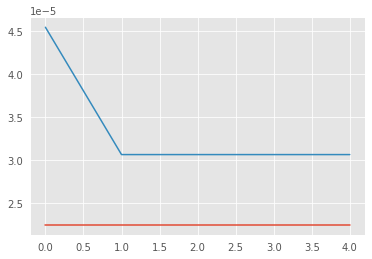

In [ ]:
plt.plot(predictions['label'])
plt.plot(predictions['prediction'])
plt.show()

In [ ]:
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))

Coefficients: [0.10932081212639014,0.00010609068939028421,-0.3285772327673711,-0.0001099803542604799,1.2191849896192888,7.811902372606194e-05]
Intercept: -2.894435021580222e-05


# Linear and Decision Tree Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Z, P, test_size = 0.2)

In [ ]:
#import the model/algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree_reg = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

In [ ]:
z_future = df_c.drop(['Prediction'], 1)[:-future_hours]
z_future = z_future.tail(future_hours)
z_future = np.array(z_future)
z_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[3973.81],
       [3958.87],
       [3987.78],
       ...,
       [6538.09],
       [6483.58],
       [6468.82]])

In [ ]:
tree_pre = tree_reg.predict(z_future)
print(tree_pre)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae= mean_absolute_error(z_future,tree_pre)
mse=mean_squared_error(z_future,tree_pre)
print("\\n",mse,mae)
#score = r2_score(new_test_Y,predicted)
#print("the r2 square of LSTM is ",score)


[6483.07 6342.34 6499.53 ... 7504.05 8237.96 7553.69]
\n 23729243.949731037 3700.0978224999994


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
linear_pre = linear_reg.predict(z_future)
print(linear_pre)
mae_lr= mean_absolute_error(z_future,tree_pre)
mse_lr=mean_squared_error(z_future,tree_pre)


print(mse_lr,mae_lr)

[4166.53614906 4158.19987713 4174.3311771  ... 5597.36181067 5566.94613578
 5558.71030086]
23729243.949731037 3700.0978224999994


In [ ]:
predictions = tree_pre 
valid = df_c[Z.shape[0]:]
valid['Predictions'] = predictions
print(valid.info(),df_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 59276 to 69275
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_price  10000 non-null  float64
 1   Prediction   0 non-null      float64
 2   Predictions  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69276 entries, 0 to 69275
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_price  69276 non-null  float64
 1   Prediction   59276 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB
None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

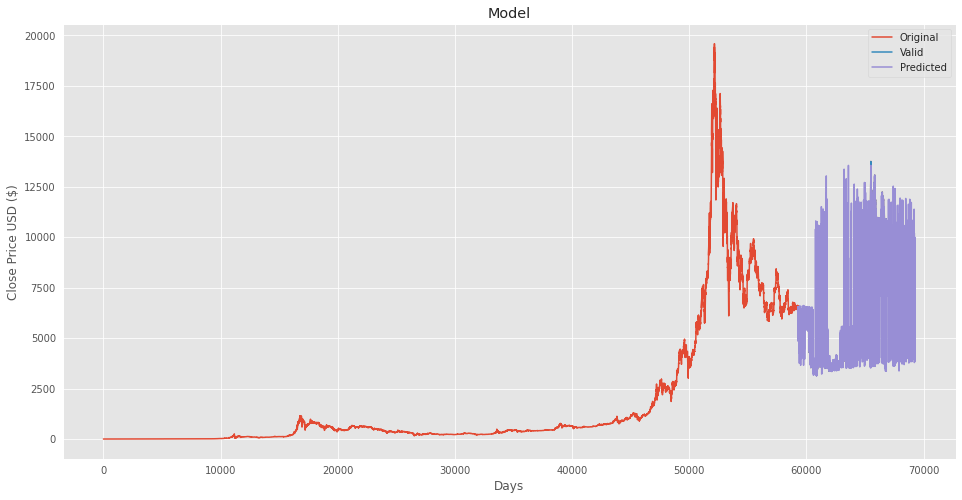

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_c['close_price'])
plt.plot(valid[['close_price', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
predictions_2 = linear_pre 
valid = df_c[Z.shape[0]:]
valid['Predictions'] = predictions_2
print(valid.info(),df_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 59276 to 69275
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_price  10000 non-null  float64
 1   Prediction   0 non-null      float64
 2   Predictions  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69276 entries, 0 to 69275
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_price  69276 non-null  float64
 1   Prediction   59276 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB
None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


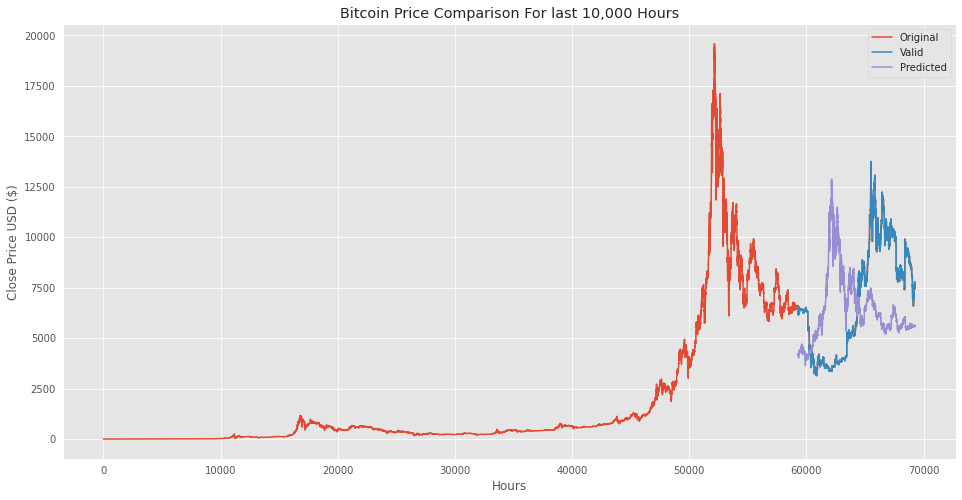

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Bitcoin Price Comparison For last 10,000 Hours")
plt.xlabel('Hours')
plt.ylabel('Close Price USD ($)')
plt.plot(df_c['close_price'])
plt.plot(valid[['close_price', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# CNN-LSTM implementation to predict stock prices of amazon

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69276 entries, 0 to 69275
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         69276 non-null  object 
 1   sentiment    69276 non-null  float64
 2   close_price  69276 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.6+ MB


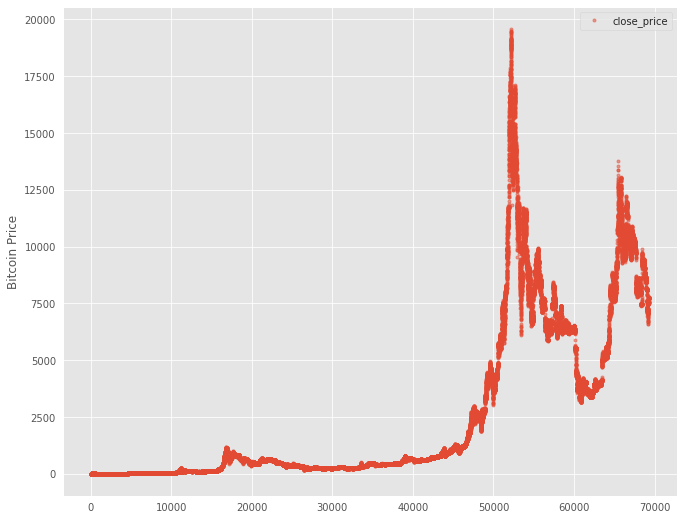

In [ ]:
cols_plot = ['close_price']
multi_axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in multi_axes:
    ax.set_ylabel('Bitcoin Price')

       sentiment  close_price
0       0.278788         4.58
1       0.000000         4.58
2       0.000000         4.58
3       0.000000         4.58
4       0.000000         4.58
...          ...          ...
69271   0.000000      7493.88
69272   0.000000      7507.12
69273   0.000000      7504.05
69274   0.000000      7522.23
69275   0.000000      7553.69

[69276 rows x 2 columns]


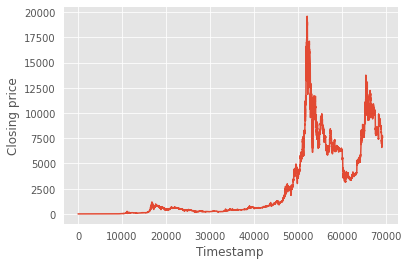

In [ ]:
plt.plot(df['close_price'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

new_df = df.drop('date', axis=1)
print(new_df)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [ ]:
# Transform the Data
new_df[["close_price"]] = encoder.fit_transform(new_df[["close_price"]])
print(new_df)

       sentiment  close_price
0       0.278788         26.0
1       0.000000         26.0
2       0.000000         26.0
3       0.000000         26.0
4       0.000000         26.0
...          ...          ...
69271   0.000000      41972.0
69272   0.000000      42007.0
69273   0.000000      41999.0
69274   0.000000      42033.0
69275   0.000000      42121.0

[69276 rows x 2 columns]


In [ ]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
var_th = VarianceThreshold(threshold=0)   # threshold = 0 for constant

In [ ]:
var_th.fit(new_df)

VarianceThreshold(threshold=0)

In [ ]:
#to check the variance of different features as
print(var_th.variances_)

[2.38753762e-02 5.11510000e+04]


In [ ]:
print(var_th.transform(new_df))

[[2.78787879e-01 2.60000000e+01]
 [0.00000000e+00 2.60000000e+01]
 [0.00000000e+00 2.60000000e+01]
 ...
 [0.00000000e+00 4.19990000e+04]
 [0.00000000e+00 4.20330000e+04]
 [0.00000000e+00 4.21210000e+04]]


In [ ]:
print('' * 10,"Separator",'' * 10)

 Separator 


In [ ]:
# dimensions of data pre and post transformation
print("EARLIER Shape of the DATA: ", new_df.shape)
print("Shape after transformation: ", var_th.transform(new_df).shape)

EARLIER Shape of the DATA:  (69276, 2)
Shape after transformation:  (69276, 2)


In [ ]:
df.iloc[0,2]

4.58

In [ ]:
df = pd.read_csv("final_merged_dataset.csv")

In [ ]:
df.head(5)

,date,sentiment,close_price
0,2012-01-01 00:00:00,0.278788,4.58
1,2012-01-01 01:00:00,0.000000,4.58
2,2012-01-01 02:00:00,0.000000,4.58
3,2012-01-01 03:00:00,0.000000,4.58
4,2012-01-01 04:00:00,0.000000,4.58


In [ ]:
df = df.drop('date', 1)
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,sentiment,close_price
0,0.278788,4.58
1,0.000000,4.58
2,0.000000,4.58
3,0.000000,4.58
4,0.000000,4.58


The data is analysed but it must be converted into data  with dimensions[100,1] to make it easier for CNN to train on... Else it won't select required features and the model is bound to fail

In [ ]:
A = []
B = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,1]
    tem1 = []
    tem2 = []
    for j in range(window_size):
        tem1.append((df.iloc[i + j, 1] - first) / first)
    tem2.append((df.iloc[i + window_size, 1] - first) / first)
    A.append(np.array(tem1).reshape(100, 1))
    B.append(np.array(tem2).reshape(1, 1))



x_train, x_test, y_train, y_test = train_test_split(A, B, test_size=0.3, shuffle=True)

new_train_X = np.array(x_train)
new_test_X = np.array(x_test)
new_train_Y = np.array(y_train)
new_test_Y = np.array(y_test)

new_train_X = new_train_X.reshape(new_train_X.shape[0],1,100,1)
new_test_X = new_test_X.reshape(new_test_X.shape[0],1,100,1)

print(len(new_train_X))
print(len(new_test_X))

48421
20753


## Training Models##
This part has 2 subparts: 1. to train CNN and 2.to train LSTM

For training CNN, we create layers with sizes 64,128,64. And in each layer, TimeDistributed function is applied for tracking features with respect to time. In between them, Pooling layers are added.

Then a dense layer with 5 neurons with L1 Kernel regularizer for L1 regularization is added

And then, it's forwarded to Bidirectional-LSTM layers

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#  create model and train it
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
model.add(TimeDistributed(Conv1D(64, kernel_size=1, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])

history = model.fit(new_train_X, new_train_Y, validation_data=(new_test_X,new_test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)


Epoch 1/40
1211/1211 [==============================] - 41s 20ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0205 - mape: 26055.5898 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0224 - val_mape: 20759.6445
Epoch 2/40
1211/1211 [==============================] - 22s 18ms/step - loss: 9.0867e-04 - mse: 9.0867e-04 - mae: 0.0182 - mape: 21572.2070 - val_loss: 8.9321e-04 - val_mse: 8.9321e-04 - val_mae: 0.0172 - val_mape: 17051.0430
Epoch 3/40
1211/1211 [==============================] - 23s 19ms/step - loss: 8.6538e-04 - mse: 8.6538e-04 - mae: 0.0178 - mape: 22105.6328 - val_loss: 7.8340e-04 - val_mse: 7.8340e-04 - val_mae: 0.0166 - val_mape: 17900.0449
Epoch 4/40
1211/1211 [==============================] - 22s 18ms/step - loss: 8.6136e-04 - mse: 8.6136e-04 - mae: 0.0178 - mape: 22753.3730 - val_loss: 7.2109e-04 - val_mse: 7.2109e-04 - val_mae: 0.0156 - val_mape: 17470.5352
Epoch 5/40
1211/1211 [==============================] - 22s 18ms/step - loss: 8.1226e-04 - mse: 8.1226e-04 - mae

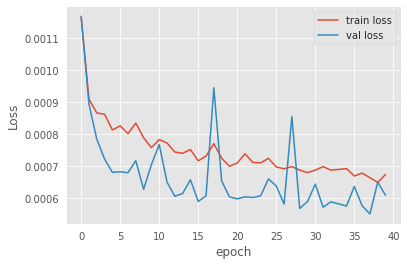

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
print("MSE = " + str(history.history['mse'][39]))
print("MAE = " + str(history.history['mae'][39]))
print("MAPE = " + str(history.history["mape"][39]))

MSE = 0.0006727268919348717
MAE = 0.015938235446810722
MAPE = 20885.77734375


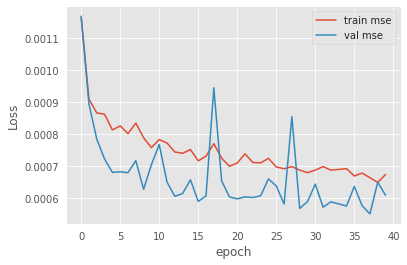

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

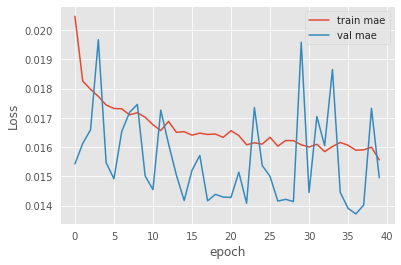

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

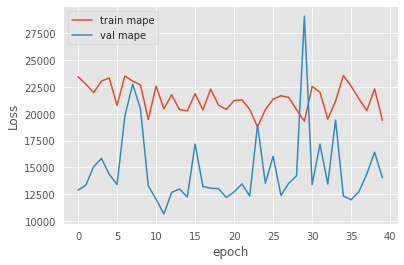

In [ ]:
plt.plot(history.history['mape'], label='train mape')
plt.plot(history.history['val_mape'], label='val mape')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 100, 64)       128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 50, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 50, 128)       8320      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 25, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 25, 64)       

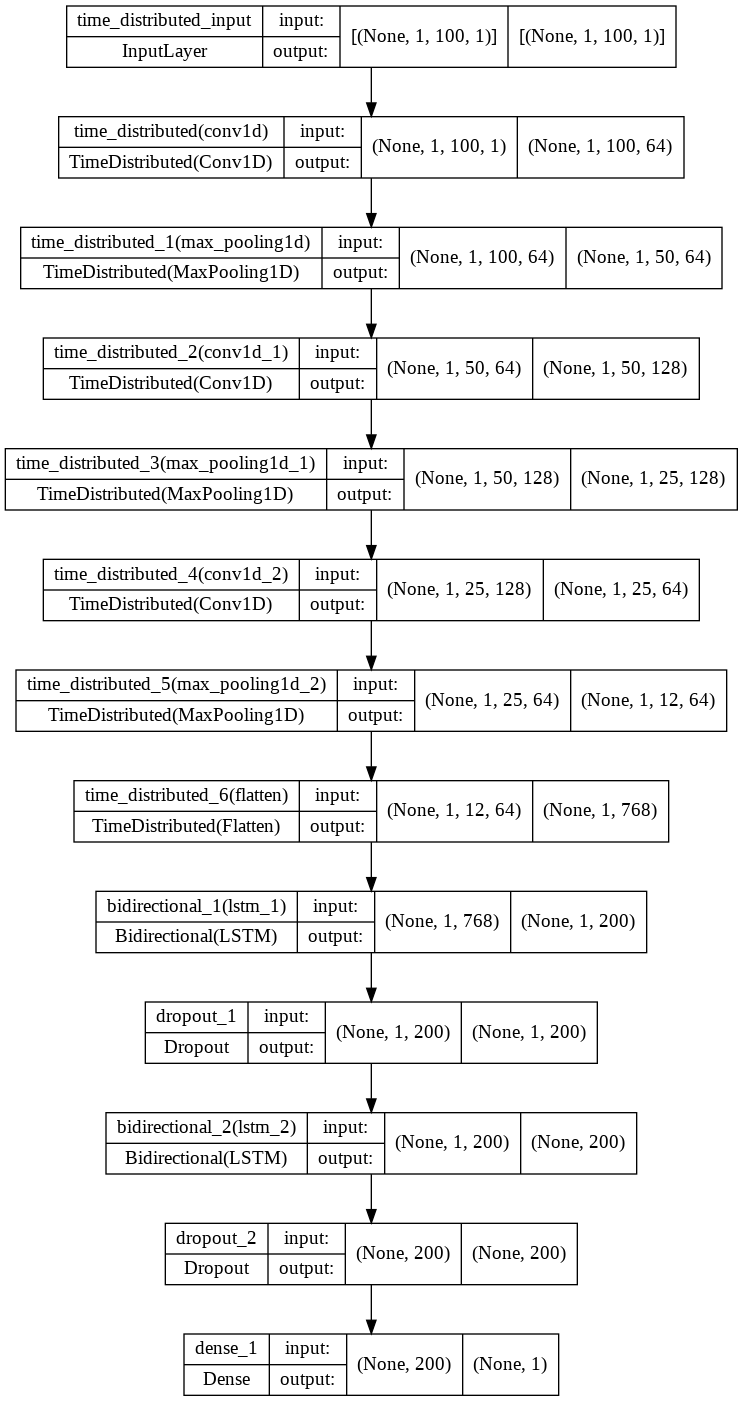

In [ ]:
# After the model has been constructed, we need to train
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(new_test_X, new_test_Y)

649/649 [==============================] - 5s 7ms/step - loss: 65054832.0000 - mse: 65054832.0000 - mae: 7418.2363 - mape: 100.0000


[65054832.0, 65054832.0, 7418.236328125, 100.00001525878906]

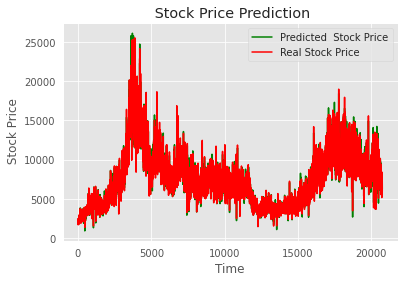

In [ ]:
predicted  = model.predict(new_test_X)
test_label = new_test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(new_train_X)
for j in range(len_t , len_t + len(new_test_X)):
    temp = df.iloc[j,1]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

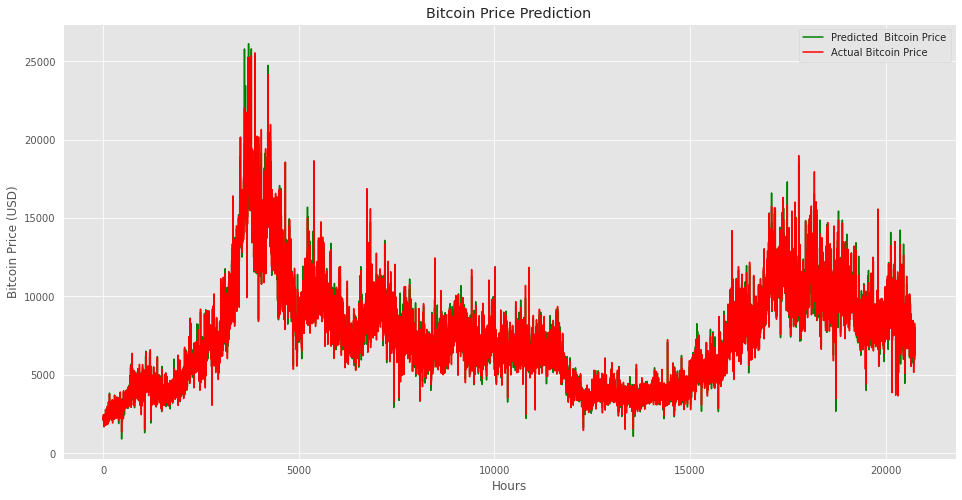

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(predicted, color = 'green', label = 'Predicted  Bitcoin Price')
plt.plot(test_label, color = 'red', label = 'Actual Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Hours')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

In [ ]:
len(predicted)

20753

In [ ]:
print(predicted)

[[0.00029981]
 [0.00018181]
 [0.0002283 ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
